In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

#### Logistic Regression

    -Logistic regression estimates the probability of a certain event occurring.
    
    -Unlike ordinary regression, LR does not assume that the relationship between the independent and dependent variables are linear.
    
    -LR is a variation of ordinary regression that is used when the dependent (response) variable is dichotomous.
    
    -LR forms a predictor variables that is a linear combination of the explanatory variables.
    
    -The values of this predictor variable are then transformed into probabilities by a logistic function which has the shape of an S.
    
    -The values of the predictor variable are displayed on the horizontal axis, and the probabilities are on the vertical axis.

In [2]:
df = sns.load_dataset("iris")

In [3]:
# from pydataset import data
# data()
# import seaborn sns
# sns.get_dataset_names()

### Exercises

-Define variable and target dataframes as x and y

In [4]:
x = df.drop(columns=["species"])

In [5]:
y = df[["species"]]

-Split data into x and y train and x and y test

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123) 

-Create the logistic regression object

-Choose the best solver for the dataset Iris

    -For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones. 
    
    -‘liblinear’ and ‘saga’ also handle L1 penalty
    
    
    -‘liblinear’ does not handle no penalty
                                                
                                                (scikit-learn.org)

In [7]:
logit = LogisticRegression(random_state = 123, solver='liblinear')

-Fit the logistic regression object to the train data sets

In [8]:
logit.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

-Pring coefficients and intercept of the model

In [9]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 0.38421538  1.32718255 -2.11307588 -0.94269552]
 [ 0.43099717 -1.34596217  0.4506587  -1.07117492]
 [-1.517952   -1.52141607  2.26046444  2.12613123]]
Intercept: 
 [ 0.25726194  0.58107381 -0.87235291]


-Estimate whether you can predict the species using the variables

In [10]:
y_pred = logit.predict(x_train)

-Estimate the probability that you can predict the species using the variables

In [11]:
y_pred_proba = logit.predict_proba(x_train)

-Evaluate Model

-Compute the accuracy

In [12]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(x_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.95


-Create a confusion matrix

In [13]:
print(confusion_matrix(y_train, y_pred))

[[32  0  0]
 [ 0 36  4]
 [ 0  1 32]]


-Compute Precision, Recall, F1-score, and Support

In [14]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.90      0.94        40
   virginica       0.89      0.97      0.93        33

    accuracy                           0.95       105
   macro avg       0.95      0.96      0.95       105
weighted avg       0.95      0.95      0.95       105



-Test Model

In [15]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(x_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.98


-Visualize Model

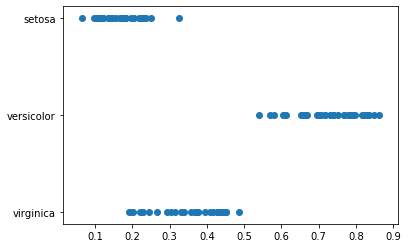

In [16]:
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)

-After creating the LR object with both solvers, Saga and Liblinear, I saw no difference in the 98% accuracy of the predictions.

#### Decision Tree Exercises

-A sequence of rules that can be used to classify 2 or more classes

-Each node represents a single input variable (x) and a split point or class of that variable

-The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

-Predictions are made by walking the splits of the tree until arriving at a leaf node and output the class value at that leaf node.

##### Pros

-Simple to understand
 
-Simple to visualize

-Simple to explain the output

-Requires little data preparation

-Can handle both numerical and categorical data

-Perform well for a broad range of problems

##### Cons

-Can create complex trees that do not generalise well.

-Can be unstable because small variations in the data might lead to overfitting.


##### Example

-Iris dataset: Identifing the iris species based on 4 measurements

-We could come up with a probability of each feature adding independently to the overall poisonousness of a mushroom. This would be a Naive Bayesian Classification but has the problem that each feature isn’t independent. There is crossover. Maybe a mushroom that is bright and flat is okay to eat while a mushroom that is bright and round isn’t.

-Instead, to build this decision tree we can take the overall algorithm:

    1. Split data into subcategories using the most informational attribute.

    2. Keep going until threshold.
    
-This algorithm is quite simple. The idea is to take the entire population of mushrooms, and split them into subcategories until we have a tree showing us how to classify something.

##### Vocab

##### Entropy and Information Gain

##### ENTROPY

-A way of determining just how descriptive bits are. A canonical example of entropy would be that if it’s always sunny in Death Valley with a probability of 100% then the entropy would be 0 to send information about what the weather of the day was. The information doesn’t need to be encoded since there’s nothing to report. Another example of high entropy would be having a complex password. The more numerous and diverse the characters you use, the higher the entropy. The same is true of attributes. If we have lots of possibilities for mushroom odor, then that would have higher entropy.

##### INFORMATION GAIN

Entropy is used to calculate information gain. Information gain is the main key that is used by Decision Tree Algorithms to construct a Decision Tree. Decision Tree algorithm will always try to maximize information gain. An attribute with highest information gain will tested/split first.
Advantage of using information gain as a hyper-parameter: "Information gain ratio biases the decision tree against considering attributes with a large number of distinct values. So it solves the drawback of information gain—namely, information gain applied to attributes that can take on a large number of distinct values might learn the training set too well. For example, suppose that we are building a decision tree for some data describing a business's customers. Information gain is often used to decide which of the attributes are the most relevant, so they can be tested near the root of the tree. One of the input attributes might be the customer's credit card number. This attribute has a high information gain, because it uniquely identifies each customer, but we do not want to include it in the decision tree: deciding how to treat a customer based on their credit card number is unlikely to generalize to customers we haven't seen before."

##### Gini Impurity

-A probabilistic measure - how probable an attribute is at showing up and the probability of it being mistaken. If the GINI impurity for attribute 1 is lower than the GINI impurity for attribute 2, while creating a decision tree we would want to choose attribute 1 as a split point first, since it will create less impurity in the tree. (Not to be confused with the GINI coefficient.)

##### Pruning the trees

-Goal is to find a subtree of the full decision tree using the preceding decision points that minimizes this error surface



1. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [17]:
from pydataset import data


df = data("iris")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [18]:
df.columns = [col.lower().replace('.', '_') for col in df]


In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


##### Split the dataframe into train and test, 70/30

In [20]:
x = df.drop(['species'],axis=1)
y = df[['species']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
115,5.8,2.8,5.1,2.4
137,6.3,3.4,5.6,2.4
54,5.5,2.3,4.0,1.3
20,5.1,3.8,1.5,0.3
39,4.4,3.0,1.3,0.2


#### Train Model


In [21]:
# for classification you can change the algorithm to gini or entropy (information gain).  Default is gini.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

#### Fit the model to the training data


In [22]:
clf.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

##### Estimate Species

In [23]:
y_pred = clf.predict(x_train)
y_pred[0:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

##### Estimate the probability of a species


In [24]:
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [0.

2. Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [25]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.98


In [28]:
confusion_matrix(y_train, y_pred)


array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [29]:
sorted(y_train.species.unique())

['setosa', 'versicolor', 'virginica']

In [30]:
y_train.species.value_counts()


versicolor    40
virginica     33
setosa        32
Name: species, dtype: int64

##### Create a classification report

-Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)

-Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)

-f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.

-Support: number of occurrences of each class in where y is true.

In [36]:
classification_dict = classification_report(y_train, y_pred, output_dict=True)

In [45]:
classification_dict

for k, v in classification_dict.items():
    print(k, v)


setosa {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32}
versicolor {'precision': 0.9523809523809523, 'recall': 1.0, 'f1-score': 0.975609756097561, 'support': 40}
virginica {'precision': 1.0, 'recall': 0.9393939393939394, 'f1-score': 0.96875, 'support': 33}
accuracy 0.9809523809523809
macro avg {'precision': 0.9841269841269842, 'recall': 0.9797979797979798, 'f1-score': 0.9814532520325203, 'support': 105}
weighted avg {'precision': 0.981859410430839, 'recall': 0.9809523809523809, 'f1-score': 0.9808870499419281, 'support': 105}


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [33]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred))

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.values.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

0    0
1    2
2    0
dtype: int64

4. Run through steps 2-4 using entropy as your measure of impurity.


5. Which performs better on your in-sample data?

#### Visualize Model


In [26]:
import graphviz

In [27]:
clf = DecisionTreeClassifier()

### Random Forest

##### Algorithm Overview

-Random forest is a type of ensemble ML algorithm called Bootstrap Aggregation or bagging.

-Bootstrapping is a statistical method for estimating a quantity from a data sample, e.g. mean. You take lots of samples of your data, calculate the mean, then average all of your mean values to give you a better estimation of the true mean value. In bagging, the same approach is used for estimating entire statistical models, such as decision trees. Multiple samples of your training data are taken and models are constructed for each sample set.

-When you need to make a prediction for new data, each model makes a prediction and the predictions are averaged to give a better estimate of the true output value.

-Random forest is a tweak on this approach where decision trees are created so that rather than selecting optimal split points, suboptimal splits are made by introducing randomness. The models created for each sample of the data are therefore more different than they otherwise would be, but still accurate in their unique and different ways. Combining their predictions results in a better estimate of the true underlying output value.

-If you get good results with an algorithm with high variance (like decision trees), you can often get better results by bagging that algorithm.